In [8]:
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [9]:
def predict(a,thres=0.5):
    if a>= thres:
        return 1
    else:
        return 0

In [10]:
# Batch size
batch_size = 32
# image height
img_height = 180
# image width
img_width = 180

In [11]:
data = []
folders = ['fresh_peaches_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'rotten_peaches_done',
 'rotten_pomegranates_done',
 'rotten_strawberries_done'
          ]
for folder in folders:
    if folder.split("_")[0] == 'fresh':
        fresh = 1
    else:
        fresh = 0
    if  folder.split("_")[1] == "peaches":
        class_name = 0
    elif folder.split("_")[1] == "pomegranates":
        class_name = 1
    else:
        class_name = 2
    for file in os.listdir('data/'+folder):
        img = cv2.imread('data/'+folder+"/"+file)      
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
        img = cv2.resize(img, (img_height, img_width)) 
        data.append((img, class_name,fresh))  

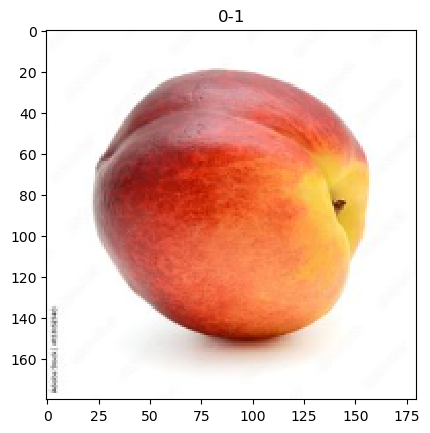

In [12]:
plt.imshow(data[0][0], interpolation='nearest')
plt.title(str(data[0][1])+ "-"+str(data[0][2]))
plt.show()

In [13]:
X = np.array([i[0] for i in data])
y_class = np.array([i[1] for i in data])
y_fresh = np.array([i[2] for i in data])
print(X.shape)
print(y_class.shape)
print(y_fresh.shape)

(1652, 180, 180, 3)
(1652,)
(1652,)


In [14]:
np.unique(y_class)

array([0, 1, 2])

In [15]:
y_class = tf.keras.utils.to_categorical(y_class)

In [16]:
y_class.shape

(1652, 3)

In [17]:
y_class

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [18]:
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(X,y_class,random_state=42,test_size=0.2)
X_train_fresh,X_test_fresh,y_train_fresh,y_test_fresh = train_test_split(X,y_fresh,random_state=42,test_size=0.2)

X_train_class = X_train_class/255.
X_train_fresh = X_train_fresh/255.
X_test_class = X_test_class/255.
X_test_fresh = X_test_fresh/255.

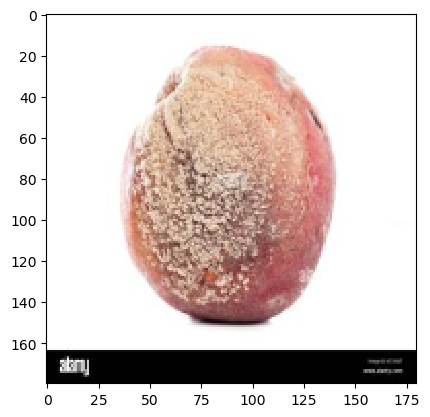

In [19]:
plt.imshow(X_train_class[7], interpolation='nearest')

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1,patience=5)

In [21]:
model = Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(32, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

In [22]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

In [24]:
epochs=15
history = model.fit(
                    X_train_fresh,
                    y_train_fresh,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks= early_stopping

)

Epoch 1/15


33/33 [==============================] - 11s 307ms/step - loss: 0.6910 - accuracy: 0.6487 - val_loss: 0.4838 - val_accuracy: 0.7887
Epoch 2/15
33/33 [==============================] - 11s 329ms/step - loss: 0.4504 - accuracy: 0.8068 - val_loss: 0.4447 - val_accuracy: 0.8038
Epoch 3/15
33/33 [==============================] - 11s 326ms/step - loss: 0.4039 - accuracy: 0.8352 - val_loss: 0.4269 - val_accuracy: 0.8226
Epoch 4/15
33/33 [==============================] - 11s 328ms/step - loss: 0.4017 - accuracy: 0.8229 - val_loss: 0.4621 - val_accuracy: 0.8038
Epoch 5/15
33/33 [==============================] - 11s 321ms/step - loss: 0.3607 - accuracy: 0.8475 - val_loss: 0.4449 - val_accuracy: 0.8151
Epoch 6/15
33/33 [==============================] - 11s 321ms/step - loss: 0.3106 - accuracy: 0.8655 - val_loss: 0.4032 - val_accuracy: 0.8453
Epoch 7/15
33/33 [==============================] - 11s 322ms/step - loss: 0.2497 - accuracy: 0.8958 - val_loss: 0.3601 - val_accuracy: 0.87

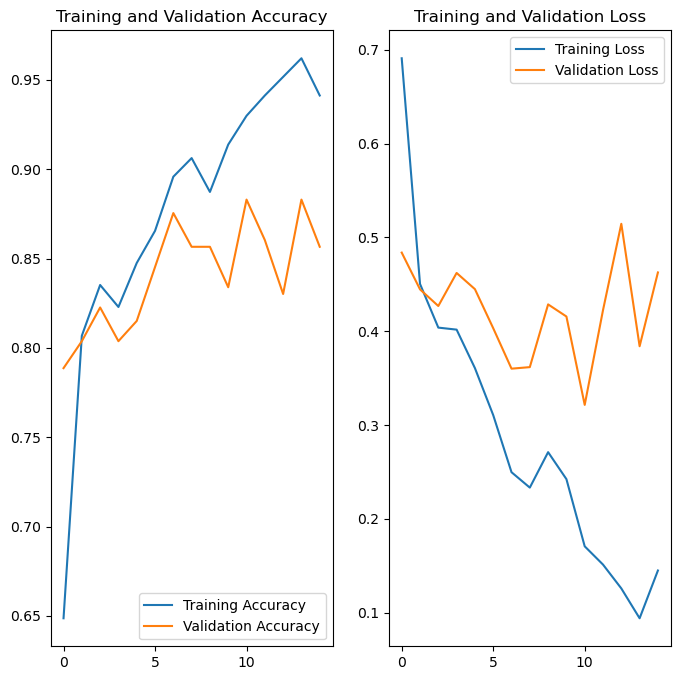

In [25]:
#get train accuracy in history
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
# get train loss 
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot loss
plt.subplot(1, 2, 2)
plt.plot( loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
y_pred_fresh = model.predict(X_test_fresh)

11/11 [==============================] - 1s 67ms/step


In [27]:
y_pred_fresh = np.array([predict(y_pred_fresh[i]) for i in range(y_pred_fresh.shape[0])])

In [28]:
y_pred_fresh

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [29]:
accuracy_score(y_test_fresh,y_pred_fresh)

0.8700906344410876

In [30]:
cf = confusion_matrix(y_test_fresh,y_pred_fresh)

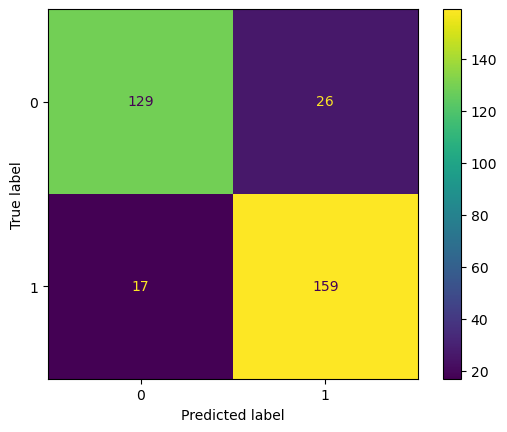

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test_fresh,y_pred_fresh)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model_aug = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
      layers.Conv2D(32, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

#compile the model
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model_aug.summary()

epochs=15
history_aug = model_aug.fit(
                    X_train_fresh,
                    y_train_fresh,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs
                    
)

In [32]:
#Try with different threshold (k) to see if adjusting the threshold can help to reduce number of FN cases
y_pred_fresh = model.predict(X_test_fresh)
score = []
for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    y_pred_thr = np.array([predict(y_pred_fresh[i],k) for i in range(y_pred_fresh.shape[0])])
    acc = accuracy_score(y_test_fresh,y_pred_thr)
    FN = cf_matrix = confusion_matrix(y_test_fresh, y_pred_thr,labels=np.unique(y_test_fresh))[1,0]
    FP = cf_matrix = confusion_matrix(y_test_fresh, y_pred_thr,labels=np.unique(y_test_fresh))[0,1]
    score.append([k,acc,FN,FP])

11/11 [==============================] - 1s 65ms/step


In [33]:
score

[[0.1, 0.8308157099697885, 5, 51],
 [0.2, 0.8580060422960725, 7, 40],
 [0.3, 0.8640483383685801, 9, 36],
 [0.4, 0.8731117824773413, 14, 28],
 [0.5, 0.8700906344410876, 17, 26],
 [0.6, 0.8580060422960725, 24, 23],
 [0.7, 0.8459214501510574, 30, 21],
 [0.8, 0.8308157099697885, 42, 14],
 [0.9, 0.8096676737160121, 53, 10],
 [1, 0.4773413897280967, 173, 0]]

Text(0.5, 1.0, 'FP cases with different threshold')

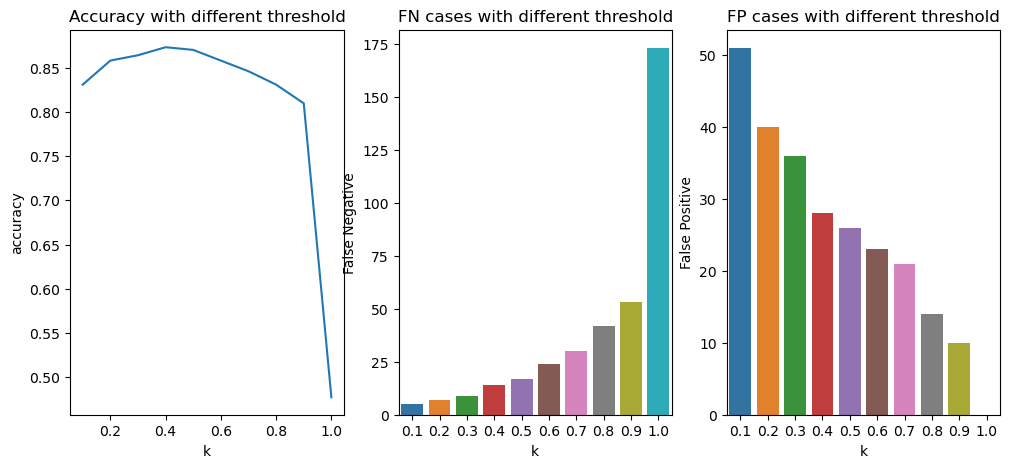

In [34]:
#Get score dataframe
score = pd.DataFrame(data=score,columns=['k','accuracy','False Negative','False Positive'])
fig,ax = plt.subplots(1,3,figsize=(12,5))
#Plot accuracy by different threshold
sns.lineplot(data=score,x='k',y='accuracy',ax=ax[0])
ax[0].set_title("Accuracy with different threshold")
#Plot number of FN cases by different threshold
sns.barplot(data=score,x='k',y='False Negative',ax=ax[1])
ax[1].set_title("FN cases with different threshold")
#Plot number of PN cases by different threshold
sns.barplot(data=score,x='k',y='False Positive',ax=ax[2])
ax[2].set_title("FP cases with different threshold")

In [35]:
for i in range(y_test_fresh.shape[0]):
    if y_test_fresh[i]==0 and y_pred_fresh[i]==1:
        plt.imshow(X_test_fresh[i])
        plt.show()

In [36]:
y_pred_fresh[1]

array([0.4872493], dtype=float32)